# INFO 2950 Final Project - Phase II

## Research Questions: 


## Data Descriptions:

We collected 5 data tables for this phase: one pertaining to the variable we are aiming to predict, and four input variables for our model.

1. **Vehicle Registration Counts by State**
   * <u>Data Source</u>: US Department of Energy - Alternative Fuels Data Center (AFDC)
   * <u>URL</u>: https://afdc.energy.gov/vehicle-registration?year=2023
   * <u>Description</u>: This page provides approximate light-duty vehicle registration counts derived by the National Renewable Energy Laboratory with data from Experian Information Solutions. Counts are rounded to the closest 100 vehicles and reflect the total number of light-duty registered vehicles through the selected year. Fuel types are based on vehicle identification numbers (VINs), which do not reflect aftermarket conversions to use different fuels or power sources.

2. **Renewable and Total Energy Production by State**
    * <u>Data Source</u>: 
    * <u>URL</u>: 
    * <u>Description</u>: 


3. **EV Pricing**
    * <u>Data Source</u>: 
    * <u>URL</u>: 
    * <u>Description</u>: 


4. **EV Charging Stations**
    * <u>Data Source</u>: 
    * <u>URL</u>: 
    * <u>Description</u>: 


5. **EV Incentives**
    * <u>Data Source</u>: 
    * <u>URL</u>: 
    * <u>Description</u>: 


## Importing:

In [1]:
pip install pdfplumber

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import requests
from bs4 import BeautifulSoup
import os
import re
import pdfplumber
from io import BytesIO

## Data Scraping:

1. **Vehicle Registration Counts by State**
   * <u>Data Source</u>: US Department of Energy - Alternative Fuels Data Center (AFDC)
   * <u>URL</u>: https://afdc.energy.gov/vehicle-registration?year=2023

In [3]:
afdc_url = "https://afdc.energy.gov/vehicle-registration?year={}"
years = range(2016, 2024)

compiled_data = []

for year in years:
    url = afdc_url.format(year)
    afdc_result = requests.get(url)

    if afdc_result.status_code == 200:
        print(f"Scraping data for {year}...")
                
    page = BeautifulSoup(afdc_result.text, 'html.parser')
                
    table = page.find('table')
                
    if table:
        rows = table.find_all('tr')

        print(f"Found {len(rows)} rows in the table for {year}.")
                    
        for row in rows[2:]: 
            cols = row.find_all('td')
            cols = [col.text.strip() for col in cols]
                        
            compiled_data.append([year] + cols)

    else:
        print(f"Failed to retrieve data for {year}: {afdc_result.status_code} - {afdc_result.reason}")


if table:
        header_row = table.find('tbody').find_all('tr')[0]
        headers = [td['headers'] for td in header_row.find_all('td')]
        clean_headers = []
        for header in headers:
            if header[0].isupper():
                    clean_headers.append(header[0].strip())
            else:
                    clean_headers.append(header[0].strip().capitalize())
        
        print(f"Headers found: {clean_headers}")
    
compiled_df = pd.DataFrame(compiled_data, columns=["Year"] + clean_headers)

print(compiled_df.head(n=5))

Scraping data for 2016...
Found 54 rows in the table for 2016.
Scraping data for 2017...
Found 54 rows in the table for 2017.
Scraping data for 2018...
Found 54 rows in the table for 2018.
Scraping data for 2019...
Found 54 rows in the table for 2019.
Scraping data for 2020...
Found 54 rows in the table for 2020.
Scraping data for 2021...
Found 54 rows in the table for 2021.
Scraping data for 2022...
Found 54 rows in the table for 2022.
Scraping data for 2023...
Found 54 rows in the table for 2023.
Headers found: ['State', 'Electric', 'PHEV', 'HEV', 'Biodiesel', 'Flex', 'CNG', 'Propane', 'Hydrogen', 'Methanol', 'Gas', 'Diesel', 'Unknown']
   Year       State Electric     PHEV      HEV Biodiesel       Flex     CNG  \
0  2016     Alabama      500      900   29,100         0    428,300  20,100   
1  2016      Alaska      200      200    5,000         0     55,700   4,900   
2  2016     Arizona    4,700    4,400   89,600         0    427,300  17,500   
3  2016    Arkansas      200      500

2. **Renewable and Total Energy Production by State**
    * <u>Data Source</u>: US Energy Information Administration (EIA) – State Energy Data System (SEDS)
    * <u>Website URL</u>: https://www.eia.gov/renewable/data.php
    * <u>PDF URL</u>: https://www.eia.gov/state/seds/sep_prod/SEDS_Production_Report.pdf

In [4]:
def extract_pdf(pdf_url, start_page, end_page):
    response = requests.get(pdf_url)
    
    if response.status_code == 200:
        file = BytesIO(response.content)
        
        with pdfplumber.open(file) as pdf:
            all_tables = []
            
            for i in range(start_page, end_page):
                one_page = []  
                count = 0  
                
                page = pdf.pages[i]
                text = page.extract_text()
                
                entries = re.findall(r'NA|\(s\)|\b\d{1,3}(?:,\d{3})*(?:\.\d+)?\b', text)
                
                cleaned_entries = [float(num.replace(',', '')) if num not in ['NA', '(s)'] else num for num in entries]
                
                one_page.extend(cleaned_entries)
                count += len(cleaned_entries)

                one_page = one_page[:354]
                
                reshaped_data = np.array(one_page).reshape(59, 6)
                
                all_tables.append(reshaped_data)
                
            return all_tables  

    else:
        return "Something went wrong"

pdf_url = 'https://www.eia.gov/state/seds/sep_prod/SEDS_Production_Report.pdf'

data = extract_pdf(pdf_url, 17, 119)

In [5]:
states = ["Alabama", "Alaska", "Arizona", "Arkansas", 
          "California", "Colorado", "Connecticut", 
          "Delaware", "District of Columbia", "Florida", 
          "Georgia", "Hawaii", "Idaho", "Illinois", 
          "Indiana", "Iowa", "Kansas", "Kentucky", 
          "Louisiana", "Maine", "Maryland", "Massachusetts", 
          "Michigan", "Minnesota", "Mississippi", "Missouri", 
          "Montana", "Nebraska", "Nevada", "New Hampshire", 
          "New Jersey", "New Mexico", "New York", "North Carolina", 
          "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", 
          "Rhode Island", "South Carolina", "South Dakota", "Tennessee",
          "Texas", "Utah", "Vermont", "Virginia", "Washington", 
          "West Virginia", "Wisconsin", "Wyoming"]

physical_units = []
thermal_units = []

for j in range(len(data)):
    df = pd.DataFrame(data[j])
    
    if j % 2 == 0: 
        state_index = j//2
        df.insert(0, 'State', states[state_index])
        physical_units.append(df)

    else:
        state_index = (j-1)//2
        df.insert(0, 'State', states[state_index])
        thermal_units.append(df)


physical_units_df = pd.concat(physical_units, ignore_index=True)

physical_units_df.insert(1, 'Units', "Physical")
physical_units_df.rename(
    columns={
            0: 'Coal (K short tons)', 
            1: 'Natural Gas (M cubic ft)',
            2: 'Crude Oil (K barrels)',
            3: 'Fuel Ethanol (K barrels)',
            4: 'Biodiesel (K barrels)',
            5: 'Renewable Diesel (K barrels)'
        }, inplace=True)


thermal_units_df = pd.concat(thermal_units, ignore_index=True)    

thermal_units_df.insert(1, 'Units', "Thermal")
thermal_units_df.rename(
        columns={
            0: 'Coal (T Btu)', 
            1: 'Natural Gas (T Btu)',
            2: 'Crude Oil (T Btu)',
            3: 'Fuel Ethanol (T Btu)',
            4: 'Biodiesel (T Btu)',
            5: 'Renewable Diesel (T Btu)'
        }, inplace=True)

print(physical_units_df.head(n=5))
print(thermal_units_df.head(n=5))

     State     Units Coal (K short tons) Natural Gas (M cubic ft)  \
0  Alabama  Physical             13011.0                     57.0   
1  Alabama  Physical             14832.0                    203.0   
2  Alabama  Physical             14219.0                    252.0   
3  Alabama  Physical             15486.0                    248.0   
4  Alabama  Physical             16440.0                    230.0   

  Crude Oil (K barrels) Fuel Ethanol (K barrels) Biodiesel (K barrels)  \
0                7329.0                       NA                    NA   
1                8064.0                       NA                    NA   
2                8030.0                       NA                    NA   
3                7348.0                       NA                    NA   
4                7635.0                       NA                    NA   

  Renewable Diesel (K barrels)  
0                           NA  
1                           NA  
2                           NA  
3       

3. **EV Manufacturer Suggested Retail Prices and Annual Fuel Cost (by Models)**
    * <u>Data Source</u>: US Department of Energy - Office of Energy efficiency & Renewable Energy
    * <u>Website URL</u>: https://www.fueleconomy.gov/feg/PowerSearch.do?action=noform&year1=2016&year2=2023&minmsrpsel=0&maxmsrpsel=0&city=0&hwy=0&comb=0&cbvtelectric=Electric&YearSel=2016-2023&make=&mclass=&vfuel=&vtype=Electric&trany=&drive=&cyl=&MpgSel=000&sortBy=Comb&Units=&url=SearchServlet&opt=new&minmsrp=0&maxmsrp=0&minmpg=0&maxmpg=0&sCharge=&tCharge=&startstop=&cylDeact=&rowLimit=200&pageno=1&tabView=0

In [6]:
# List of URLs for multiple pages
urls = [
    'https://www.fueleconomy.gov/feg/PowerSearch.do?action=noform&year1=2016&year2=2023&minmsrpsel=0&maxmsrpsel=0&city=0&hwy=0&comb=0&cbvtelectric=Electric&YearSel=2016-2023&make=&mclass=&vfuel=&vtype=Electric&trany=&drive=&cyl=&MpgSel=000&sortBy=Comb&Units=&url=SearchServlet&opt=new&minmsrp=0&maxmsrp=0&minmpg=0&maxmpg=0&sCharge=&tCharge=&startstop=&cylDeact=&rowLimit=200&pageno=1&tabView=2',
    'https://www.fueleconomy.gov/feg/PowerSearch.do?action=noform&year1=2016&year2=2023&minmsrpsel=0&maxmsrpsel=0&city=0&hwy=0&comb=0&cbvtelectric=Electric&YearSel=2016-2023&make=&mclass=&vfuel=&vtype=Electric&trany=&drive=&cyl=&MpgSel=000&sortBy=Comb&Units=&url=SearchServlet&opt=new&minmsrp=0&maxmsrp=0&minmpg=0&maxmpg=0&sCharge=&tCharge=&startstop=&cylDeact=&rowLimit=200&pageno=2&tabView=2',
    'https://www.fueleconomy.gov/feg/PowerSearch.do?action=noform&year1=2016&year2=2023&minmsrpsel=0&maxmsrpsel=0&city=0&hwy=0&comb=0&cbvtelectric=Electric&YearSel=2016-2023&make=&mclass=&vfuel=&vtype=Electric&trany=&drive=&cyl=&MpgSel=000&sortBy=Comb&Units=&url=SearchServlet&opt=new&minmsrp=0&maxmsrp=0&minmpg=0&maxmpg=0&sCharge=&tCharge=&startstop=&cylDeact=&rowLimit=200&pageno=3&tabView=2'
]

# Initialize lists for data storage
years = []
models = []
annual_fuel_costs = []
msrp_prices = []

# Loop over each URL to fetch data from multiple pages
for url in urls:
    # Send request and parse HTML
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all 'tr' tags with the 'ymm-row' class
    vehicle_rows = soup.find_all('tr', class_='ymm-row')

    # Loop over each 'ymm-row' and find the next row for cost and msrp
    for vehicle_row in vehicle_rows:
        # Get vehicle details
        vehicle_tag = vehicle_row.find('a')
        if vehicle_tag:
            vehicle_text = vehicle_tag.get_text(strip=True)
            year, model = vehicle_text.split(' ', 1)  # Split on the first space to separate year and model
            years.append(year)
            models.append(model)
        else:
            years.append(np.nan)
            models.append(np.nan)

        # Find the next sibling row for cost and MSRP
        cost_row = vehicle_row.find_next_sibling('tr')
        if cost_row:
            fuel_cost_tag = cost_row.find('td', class_='ann-fuel-cost')
            msrp_tag = cost_row.find('td', class_='msrp')

            # Check if MSRP exists, else skip this entry
            if msrp_tag:
                # Process fuel cost
                if fuel_cost_tag:
                    fuel_cost_text = fuel_cost_tag.get_text(strip=True)
                    annual_fuel_costs.append(fuel_cost_text.replace('\r', '').replace('\n', '').replace('\t', ''))
                else:
                    annual_fuel_costs.append(np.nan)

                # Process MSRP and clean up
                msrp_text = msrp_tag.get_text(strip=True)
                msrp_cleaned = msrp_text.replace('\r', '').replace('\n', '').replace('\t', '')
                msrp_prices.append(msrp_cleaned)
            else:
                # If MSRP is missing, skip this entry
                years.pop()  # Remove the last added item from years
                models.pop()  # Remove the last added item from models
        else:
            # If there's no next row, remove the last entry
            years.pop()
            models.pop()

# Create DataFrame
pricing_data = {
    'Year': years,
    'Model': models,
    'Annual Fuel Cost': annual_fuel_costs,
    'MSRP': msrp_prices
}
pricing_df = pd.DataFrame(pricing_data)

# Convert 'Year' to numeric for sorting, ignoring errors for NaN
pricing_df['Year'] = pd.to_numeric(pricing_df['Year'], errors='coerce')

# Sort by Year
pricing_df_sorted = pricing_df.sort_values(by='Year', ascending=True)

# Display the DataFrame
print(pricing_df_sorted)

     Year                                    Model Annual Fuel Cost  \
94   2016      Nissan Leaf (24 kW-hr battery pack)             $650   
29   2016                               BMW i3 BEV             $600   
157  2016        smart fortwo electric drive coupe             $700   
156  2016  smart fortwo electric drive convertible             $700   
229  2016    Tesla Model S (60 kW-hr battery pack)             $750   
..    ...                                      ...              ...   
307  2023                  Volvo C40 Recharge twin             $850   
309  2023                         Vinfast VF 8 Eco             $850   
310  2023  Nissan ARIYA PLAT Plus e-4ORCE 87kWh 20             $850   
314  2023   BMW i7 xDrive60 Sedan (21 inch wheels)             $850   
441  2023                      Lordstown Endurance           $1,600   

                 MSRP  
94   $29,010– $36,790  
29            $42,400  
157                    
156                    
229           $66,000  
.. 

## Data Cleaning:

1. **EV Registration Data**

Since we want to predict the EV registration rate, we first need to convert the registration data into numeric types for future use.

In [7]:
def clean_regis(regis):
    if pd.isna(regis):
        return None
    regis = regis.replace(',', '').strip()
    return float(regis)

compiled_df['Electric'] = compiled_df['Electric'].apply(clean_regis)
print(compiled_df)

     Year          State   Electric       PHEV        HEV  Biodiesel  \
0    2016        Alabama      500.0        900     29,100          0   
1    2016         Alaska      200.0        200      5,000          0   
2    2016        Arizona     4700.0      4,400     89,600          0   
3    2016       Arkansas      200.0        500     19,100          0   
4    2016     California   141500.0    116,700    966,700          0   
..    ...            ...        ...        ...        ...        ...   
411  2023     Washington   152100.0     41,200    307,200     73,800   
412  2023  West Virginia     2800.0      1,800     22,400     17,300   
413  2023      Wisconsin    24900.0     12,500    123,600     52,900   
414  2023        Wyoming     1100.0        800      8,400     21,200   
415  2023  United States  3555900.0  1,307,200  7,392,300  2,803,600   

           Flex     CNG Propane Hydrogen Methanol          Gas     Diesel  \
0       428,300  20,100       0        0        0    3,777

2. **EV Manufacturer Suggested Retail Prices and Annual Fuel Cost (by Models)**

To look into the pricing data, we clean the MSRP column from our pricing dataset, which contain values in different formats (e.g., ranges, with dollar signs, commas, etc.). We also drop rows with missing prices.

In [8]:
# print(pricing_df_sorted['MSRP'])

# handle MSRP ranges and convert to numeric
def clean_msrp(msrp):
    if pd.isna(msrp) or msrp.strip() == '':  # Check for NaN or empty string
        return None
    msrp = msrp.replace('$', '').replace(',', '').strip()  # Remove $, commas, and spaces
    if '– ' in msrp:  # Handle price ranges
        low, high = msrp.split('–')
        return (float(low) + float(high)) / 2
    else:
        return float(msrp)  # Convert single price values to float

pricing_df_sorted['MSRP'] = pricing_df_sorted['MSRP'].apply(clean_msrp)

# drop rows where MSRP is NaN
pricing_df_sorted = pricing_df_sorted.dropna(subset=['MSRP'])

print(pricing_df_sorted)

     Year                                   Model Annual Fuel Cost      MSRP
94   2016     Nissan Leaf (24 kW-hr battery pack)             $650   32900.0
29   2016                              BMW i3 BEV             $600   42400.0
229  2016   Tesla Model S (60 kW-hr battery pack)             $750   66000.0
237  2016   Tesla Model S (75 kW-hr battery pack)             $750   74500.0
240  2016               Tesla Model S AWD - P100D             $800  134500.0
..    ...                                     ...              ...       ...
73   2023                  Kia EV6 Long Range RWD             $650   42600.0
306  2023  BMW i7 xDrive60 Sedan (19 inch wheels)             $850  119300.0
307  2023                 Volvo C40 Recharge twin             $850   57700.0
309  2023                        Vinfast VF 8 Eco             $850   49000.0
314  2023  BMW i7 xDrive60 Sedan (21 inch wheels)             $850  119300.0

[323 rows x 4 columns]


## Exploratory Data Analysis: 

1. **EV Manufacturer Suggested Retail Prices (by Models)**

We want to explore the trend of average EV prices over the years. We first calculates the average EV price (MSRP) for each year.
And we plots the trend of EV prices over time, providing insights into how EV prices have changed year over year.

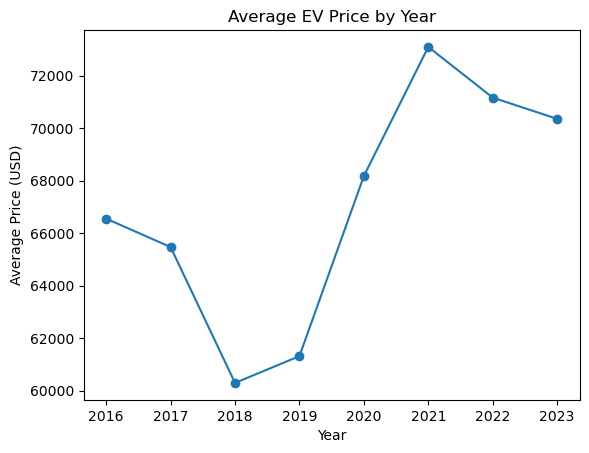

In [9]:
# calculate the average MSRP by year
avg_prices_per_year = pricing_df_sorted.groupby('Year')['MSRP'].mean()

plt.plot(avg_prices_per_year.index, avg_prices_per_year.values, marker='o')
plt.title('Average EV Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')
plt.show()

Here we compute the annual registration and visualize the relationship between the average EV price and total EV registrations over the years on a single chart.

Year
2016     560600.0
2017     754200.0
2018    1145200.0
2019    1567200.0
2020    2037800.0
Name: Electric, dtype: float64


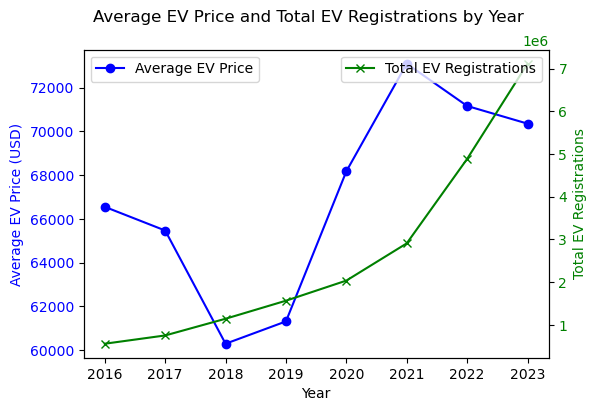

In [15]:
annual_registrations = compiled_df.groupby('Year')['Electric'].sum()
print(annual_registrations.head())

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(6, 4))

# Plot the average EV price with ax1
ax1.set_xlabel('Year')
ax1.set_ylabel('Average EV Price (USD)', color='blue')
ax1.plot(avg_prices_per_year.index, avg_prices_per_year.values, label='Average EV Price', color='blue', marker='o')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for total EV registrations
ax2 = ax1.twinx()
ax2.set_ylabel('Total EV Registrations', color='green')
ax2.plot(annual_registrations.index, annual_registrations.values, label='Total EV Registrations', color='green', marker='x')
ax2.tick_params(axis='y', labelcolor='green')

# Add title and legends
fig.suptitle('Average EV Price and Total EV Registrations by Year')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

Now we want to see the relationship between average EV prices and total EV registrations over the years. A scatter plot is used because it can show whether there's any correlation between the two variables

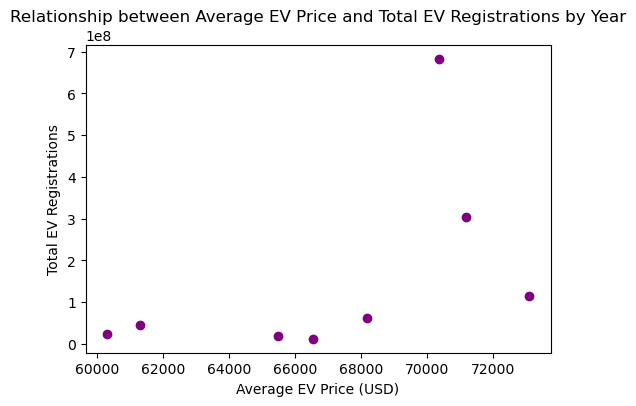

In [13]:
registration_pricing_df = pd.merge(pricing_df_sorted, compiled_df, on='Year', how='inner')

# Group by Year to get the required aggregates
annual_data = registration_pricing_df.groupby('Year').agg({'Electric': 'sum', 'MSRP': 'mean'}).reset_index()

# Plot the relationship using a scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(annual_data['MSRP'], annual_data['Electric'], color='purple', marker='o')

# Add labels and title
plt.xlabel('Average EV Price (USD)')
plt.ylabel('Total EV Registrations')
plt.title('Relationship between Average EV Price and Total EV Registrations by Year')

plt.show()

We also group the registration_pricing_df DataFrame by both 'Year' and 'State' to calculate aggregates for each state in each year. This leads to a scatter plot where we visualize the relationship between average EV price (MSRP) and total EV registrations (Electric) for each state

   Year       State   Electric          MSRP
0  2016     Alabama    11000.0  66551.136364
1  2016      Alaska     4400.0  66551.136364
2  2016     Arizona   103400.0  66551.136364
3  2016    Arkansas     4400.0  66551.136364
4  2016  California  3113000.0  66551.136364


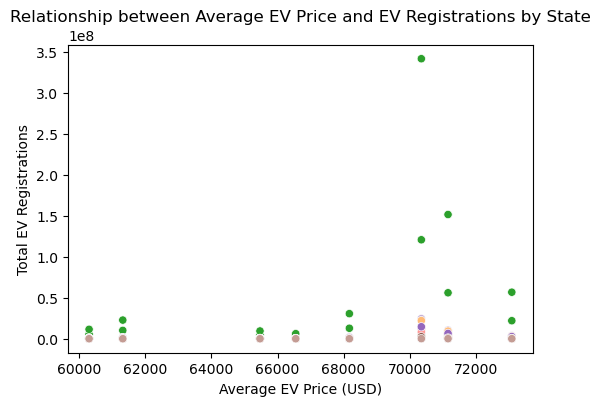

In [16]:
state_annual_data = registration_pricing_df.groupby(['Year', 'State']).agg({'Electric': 'sum', 'MSRP': 'mean'}).reset_index()

print(state_annual_data.head())

plt.figure(figsize=(6, 4))
sns.scatterplot(data=state_annual_data, x='MSRP', y='Electric', hue='State', palette='tab20', legend=False)
plt.title('Relationship between Average EV Price and EV Registrations by State')
plt.xlabel('Average EV Price (USD)')
plt.ylabel('Total EV Registrations')
plt.show()

## Data Limitations:

## Questions For Reviewers: 